In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from cat_analysis.io import read_trip_file_names

In [45]:
files = read_trip_file_names('/home/tom/Documents/code/cats_data')

In [281]:
df = pd.read_csv(files[32], usecols=[i for i in range(33)])

In [282]:
#reformat column header names
df.columns = (df.columns.str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', '')
             )

In [283]:
df = df[~df['timestamp'].str.contains("Invalid Date")]

In [284]:
df['timestamp'] = pd.to_datetime(df['timestamp'] )

In [285]:
records_per_sec = df.groupby(by='timestamp')['timestamp'].count()
records_per_sec.value_counts()

2    3795
1     107
Name: timestamp, dtype: int64

In [286]:
df.shape

(7697, 33)

In [287]:
df_small = df.iloc[0:10]
df_small.shape

(10, 33)

In [288]:
df_small['wpleth'].iloc[0].replace(' \"', ' ')

'0.33699634 0.32625153 0.32210012 0.33015873 0.35531136 0.39853480 0.45616606 0.52210012 0.58632479 0.64004884 0.67716728 0.69499389 0.69621490 0.68595849 0.66959707 0.65201465 0.63638584 0.62368742 0.61318681 0.60390720 0.59413919 0.58315018 0.57045177 0.55579976 0.53943834 0.52210012 0.50451770 0.48840049 0.47448107 0.46202686 0.45054945 0.44053724 0.43101343 0.42148962 0.41172161 0.40244200 0.39340659 0.38485958 0.37680098 0.36971917 0.36361416 0.35775336 0.35067155 0.34163614 0.33040293 0.31794872 0.30744811 0.30500611 0.31623932 0.34505495 0.39194139 0.45323565 0.52112332 0.58608059 0.63907204 0.67423687 0.69010989 0.68962149 0.67863248 0.66275946 0.64615385 0.63150183 0.61953602 0.61025641 '

In [289]:
np.fromstring(df_small['wpleth'].iloc[0].replace(' \"', ' '), dtype=float, sep=' ')

array([0.33699634, 0.32625153, 0.32210012, 0.33015873, 0.35531136,
       0.3985348 , 0.45616606, 0.52210012, 0.58632479, 0.64004884,
       0.67716728, 0.69499389, 0.6962149 , 0.68595849, 0.66959707,
       0.65201465, 0.63638584, 0.62368742, 0.61318681, 0.6039072 ,
       0.59413919, 0.58315018, 0.57045177, 0.55579976, 0.53943834,
       0.52210012, 0.5045177 , 0.48840049, 0.47448107, 0.46202686,
       0.45054945, 0.44053724, 0.43101343, 0.42148962, 0.41172161,
       0.402442  , 0.39340659, 0.38485958, 0.37680098, 0.36971917,
       0.36361416, 0.35775336, 0.35067155, 0.34163614, 0.33040293,
       0.31794872, 0.30744811, 0.30500611, 0.31623932, 0.34505495,
       0.39194139, 0.45323565, 0.52112332, 0.58608059, 0.63907204,
       0.67423687, 0.69010989, 0.68962149, 0.67863248, 0.66275946,
       0.64615385, 0.63150183, 0.61953602, 0.61025641])

In [290]:
cols_todrop = []
for col in df.columns[24:]:
    
    np_label = col + '_np'
    
    df[np_label] = df[col].apply(str).apply(lambda x: np.fromstring(x.replace(' \"',' ')
                                                    .replace('nan','')
                                                    ,sep=' '))
    
    df[col+'_avg'] = df[np_label].map(lambda x: x.mean() if x.shape[0] > 0 else None)
    df[col+'_std'] = df[np_label].map(lambda x: x.std() if x.shape[0] > 0 else None)
    df[col+'_min'] = df[np_label].map(lambda x: x.min() if x.shape[0] > 0 else None)
    df[col+'_max'] = df[np_label].map(lambda x: x.max() if x.shape[0] > 0 else None)
 
    cols_todrop.append(col)
    cols_todrop.append(np_label)
    

df.drop(cols_todrop, inplace=True, axis=1)

In [291]:
df.iloc[:, 24:]

,wecgi_avg,wecgi_std,wecgi_min,wecgi_max,wecgii_avg,wecgii_std,wecgii_min,wecgii_max,wecgiii_avg,wecgiii_std,...,wcoo_min,wcoo_max,wpleth_avg,wpleth_std,wpleth_min,wpleth_max,wresp_avg,wresp_std,wresp_min,wresp_max
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.500534,0.130919,0.305006,0.696215,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.500000,143.500000,0.485268,0.122002,0.306227,0.706716,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.626667,4.346667,0.479045,0.122702,0.296947,0.697924,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040000,4.346667,0.499075,0.128318,0.292308,0.709890,0.308920,0.505263,-0.300000,0.800000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0.006201,0.940110,-4.635,1.905,NaN,NaN,...,0.040000,4.360000,0.497316,0.127114,0.293284,0.708913,0.273588,0.525324,-0.300000,0.800000
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df['wpleth_np'] = df['wpleth'].apply(str).apply(lambda x: np.fromstring(x.replace(' \"',' ')
                                                    .replace('nan','')
                                                    , sep=' '))

In [204]:
df['wpleth_avg'] = df['wpleth_np'].map(lambda x: x.mean() if x.shape[0] > 0 else None)
df['wpleth_std'] = df['wpleth_np'].map(lambda x: x.std() if x.shape[0] > 0 else None)
df['wpleth_min'] = df['wpleth_np'].map(lambda x: x.min() if x.shape[0] > 0 else None)
df['wpleth_max'] = df['wpleth_np'].map(lambda x: x.max() if x.shape[0] > 0 else None)

Index(['wecgi', 'wecgii', 'wecgiii', 'wabp', 'wart', 'wcvp', 'wcoo', 'wpleth',
       'wresp', 'wpleth_np', 'wpleth_avg', 'wpleth_std', 'wpleth_max',
       'wpleth_min'],
      dtype='object')

In [214]:
df.iloc[:, 24:]

,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp,wpleth_np,wpleth_avg,wpleth_std,wpleth_max,wpleth_min
0,NaN,"""",NaN,NaN,NaN,NaN,"""",0.33699634 0.32625153 0.32210012 0.33015873 0....,"""","[0.33699634, 0.32625153, 0.32210012, 0.3301587...",0.500534,0.130919,0.696215,0.305006
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,NaN,"""""""",NaN,NaN,NaN,NaN,143.00000000 143.00000000 143.00000000 143.500...,0.60146520 0.59194139 0.58119658 0.56825397 0....,"""""""","[0.6014652, 0.59194139, 0.58119658, 0.56825397...",0.485268,0.122002,0.706716,0.306227
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,NaN,"""""""",NaN,NaN,NaN,NaN,1.93333333 2.24000000 2.56000000 2.85333333 3....,0.68473748 0.66788767 0.65201465 0.63809524 0....,"""""""","[0.68473748, 0.66788767, 0.65201465, 0.6380952...",0.479045,0.122702,0.697924,0.296947
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,NaN,"""""""",NaN,NaN,NaN,NaN,0.44000000 0.24000000 0.20000000 0.16000000 0....,0.60122100 0.65616606 0.69255189 0.70915751 0....,0.10373626 0.25792430 0.42017094 0.56119658 0....,"[0.601221, 0.65616606, 0.69255189, 0.70915751,...",0.499075,0.128318,0.709890,0.292308
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,NaN,1.62500000 1.52500000 1.00000000 0.19500000 -0...,NaN,NaN,NaN,NaN,4.34666667 4.34666667 4.34666667 4.36000000 4....,0.30158730 0.32991453 0.37826618 0.44273504 0....,-0.30000000 -0.30000000 -0.30000000 -0.3000000...,"[0.3015873, 0.32991453, 0.37826618, 0.44273504...",0.497316,0.127114,0.708913,0.293284
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [171]:
index = 8
np.fromstring(df_small['wpleth'].apply(str).iloc[2].replace(' \"', ' ').replace('nan', ''), dtype=float, sep=' ')


,0
0,0.601465
1,0.591941
2,0.581197
3,0.568254
4,0.553114
5,0.536508
6,0.519658
7,0.502808
8,0.486935
9,0.472772


In [10]:
replace = lambda a: None if a == 8388607.0 else a

In [11]:
missing_value = 8388607.0
df_small = df_small.replace(8388607.0, None)

In [90]:
df_small.sort_values(by=['timestamp'])

,catsid,timestamp,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
0,30006,2016-07-01 19:53:40,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""",NaN,NaN,NaN,NaN,"""",0.33699634 0.32625153 0.32210012 0.33015873 0....,""""
1,30006,2016-07-01 19:53:41,6.0,165.0,89.4,94.0,30.0,48.0,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30006,2016-07-01 19:53:41,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,NaN,NaN,143.00000000 143.00000000 143.00000000 143.500...,0.60146520 0.59194139 0.58119658 0.56825397 0....,""""""""
3,30006,2016-07-01 19:53:42,6.0,166.0,89.4,94.0,30.0,48.0,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30006,2016-07-01 19:53:42,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,NaN,NaN,1.93333333 2.24000000 2.56000000 2.85333333 3....,0.68473748 0.66788767 0.65201465 0.63809524 0....,""""""""
5,30006,2016-07-01 19:53:43,6.0,167.0,89.3,94.0,30.0,48.0,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30006,2016-07-01 19:53:43,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""""""",NaN,NaN,NaN,NaN,0.44000000 0.24000000 0.20000000 0.16000000 0....,0.60122100 0.65616606 0.69255189 0.70915751 0....,0.10373626 0.25792430 0.42017094 0.56119658 0....
7,30006,2016-07-01 19:53:44,6.0,168.0,89.3,94.0,30.0,48.0,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30006,2016-07-01 19:53:44,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.62500000 1.52500000 1.00000000 0.19500000 -0...,NaN,NaN,NaN,NaN,4.34666667 4.34666667 4.34666667 4.36000000 4....,0.30158730 0.32991453 0.37826618 0.44273504 0....,-0.30000000 -0.30000000 -0.30000000 -0.3000000...
9,30006,2016-07-01 19:53:45,6.0,169.0,89.2,94.0,30.0,48.0,NaN,NaN,...,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_small['timestamp'].min()

Timestamp('2016-10-07 16:37:27')

In [14]:
df_small['timestamp'].max()

Timestamp('2016-10-07 17:41:10')

In [15]:
#actions
#1. type = concat
#2 hr_0002-4182 == aggregate drop NaN


In [16]:
#lambdas to drop any NaNs from a set and revert to scaler
drop_nan = lambda a: {x for x in a if x==x}
revert_to_scalar = lambda a: a.values[len(a)-1] if len(a) > 0 else None
drop_missing = lambda a: a if a < 1000 else None

drop_nan.__name__ = 'drop_na'
revert_to_scalar.__name__ = 'scalar'
drop_missing.__name__ = 'drop_mis'

In [17]:
dict_apply = {}

for col in df_small.columns[3:]:
    dict_apply[str(col)] = (set, drop_nan, revert_to_scalar)

In [18]:
df_agg = pd.concat([df_small.groupby(by='timestamp')['catsid'].count(),
                   df_small.groupby(by='timestamp')['type'].apply(set),
                   df_small.groupby(by='timestamp').agg(dict_apply)],
                   axis=1)

df_agg.index = pd.to_datetime(df_agg.index)
df_agg.rename(columns={'catsid':'count'})
df_agg.head()

,catsid,type,"(hr_0002-4182, set)","(hr_0002-4182, drop_na)","(hr_0002-4182, scalar)","(spo2_0002-4bb8, set)","(spo2_0002-4bb8, drop_na)","(spo2_0002-4bb8, scalar)","(nbps_0002-4a05, set)","(nbps_0002-4a05, drop_na)",...,"(wcvp, scalar)","(wcoo, set)","(wcoo, drop_na)","(wcoo, scalar)","(wpleth, set)","(wpleth, drop_na)","(wpleth, scalar)","(wresp, set)","(wresp, drop_na)","(wresp, scalar)"
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:27,1,{9},{nan},{},NaN,{nan},{},NaN,{nan},{},...,NaN,"{""}","{""}","""",{0.45250305 0.45543346 0.45860806 0.46178266 0...,{0.45250305 0.45543346 0.45860806 0.46178266 0...,0.45250305 0.45543346 0.45860806 0.46178266 0....,"{""}","{""}",""""
2016-10-07 16:37:28,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, """"""}","{""""""}",NaN,"{nan, 0.47252747 0.47081807 0.46910867 0.46788...",{0.47252747 0.47081807 0.46910867 0.46788767 0...,NaN,"{nan, """"""}","{""""""}",NaN
2016-10-07 16:37:29,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 3.6666667 3.68 3.6933333 3.72 3.7333333 ...",{3.6666667 3.68 3.6933333 3.72 3.7333333 3.746...,NaN,{0.62686203 0.62148962 0.61391941 0.604884 0.5...,{0.62686203 0.62148962 0.61391941 0.604884 0.5...,NaN,"{nan, """"""}","{""""""}",NaN
2016-10-07 16:37:30,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 4.04 4.04 4.0266667 4.0266667 3.84 3.653...",{4.04 4.04 4.0266667 4.0266667 3.84 3.6533333 ...,NaN,"{nan, 0.37240537 0.37777778 0.38778999 0.40317...",{0.37240537 0.37777778 0.38778999 0.4031746 0....,NaN,{-0.3 -0.3 -0.3 -0.3 -0.2984127 -0.26825397 -0...,{-0.3 -0.3 -0.3 -0.3 -0.2984127 -0.26825397 -0...,NaN
2016-10-07 16:37:31,2,"{9, 6}","{nan, 104.0}",{104.0},104.0,"{nan, 100.0}",{100.0},100.0,"{nan, nan}",{},...,NaN,"{nan, 0.053333333 0.053333333 0.053333333 0.05...",{0.053333333 0.053333333 0.053333333 0.0533333...,NaN,"{nan, 0.41489621 0.41098901 0.40708181 0.40366...",{0.41489621 0.41098901 0.40708181 0.403663 0.4...,NaN,"{1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ""1 1 1 1 1 1 ...","{1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ""1 1 1 1 1 1 ...",NaN


In [19]:
to_drop = [col for col in df_agg.columns[2:] if 'set' in col]
df_agg = df_agg.drop(columns=to_drop)

In [20]:
to_drop = [col for col in df_agg.columns[2:] if 'drop_na' in col]
df_agg = df_agg.drop(columns=to_drop)

In [21]:
dict_cols = {}
for col in df_agg.columns[2:]:
    dict_cols[col] = col[0]
   
df_agg = df_agg.rename(columns=dict_cols)

In [22]:
df_agg.shape

(3799, 32)

In [23]:
df_agg.head()

,catsid,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 16:37:27,1,{9},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"""",NaN,NaN,"""",NaN,"""",0.45250305 0.45543346 0.45860806 0.46178266 0....,""""
2016-10-07 16:37:28,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:29,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:30,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 16:37:31,2,"{9, 6}",104.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_agg.tail()

,catsid,type,hr_0002-4182,spo2_0002-4bb8,nbps_0002-4a05,nbpd_0002-4a06,nbpm_0002-4a07,abps_0002-4a15,abpd_0002-4a16,abpm_0002-4a17,...,co2_0002-50b0,wecgi,wecgii,wecgiii,wabp,wart,wcvp,wcoo,wpleth,wresp
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-07 17:41:06,2,"{9, 6}",100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:07,2,"{9, 6}",100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:08,2,"{9, 6}",99.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:09,2,"{9, 6}",99.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 17:41:10,2,"{9, 6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.015 -0.02 -0.02 -0.025 -0.03 -0.035 -0.04 -...,NaN,NaN,101 101.75 100.5 97.75 93.75 88.75 83.1875 77....,NaN,4.6533333 4.6533333 4.64 4.64 4.64 4.64 4.64 4...,0.44884005 0.43785104 0.42905983 0.42148962 0....,0.84 0.65301587 0.45809524 0.30190476 0.189206...


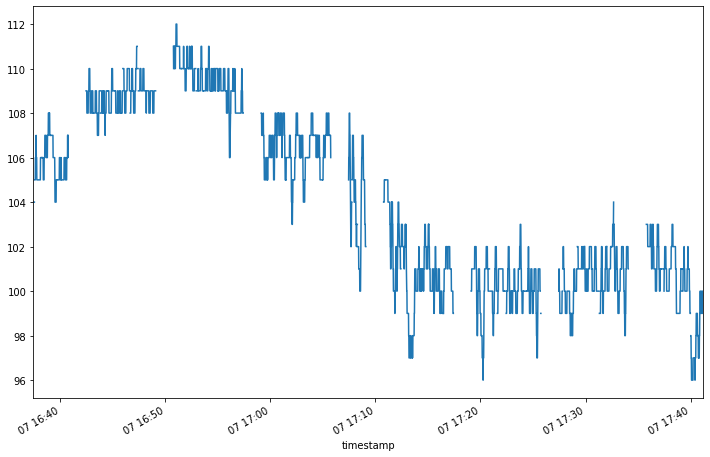

In [25]:
df_agg['hr_0002-4182'].plot(figsize=(12,8))

In [26]:
df_agg.index

DatetimeIndex(['2016-10-07 16:37:27', '2016-10-07 16:37:28',
               '2016-10-07 16:37:29', '2016-10-07 16:37:30',
               '2016-10-07 16:37:31', '2016-10-07 16:37:32',
               '2016-10-07 16:37:33', '2016-10-07 16:37:34',
               '2016-10-07 16:37:35', '2016-10-07 16:37:36',
               ...
               '2016-10-07 17:41:01', '2016-10-07 17:41:02',
               '2016-10-07 17:41:03', '2016-10-07 17:41:04',
               '2016-10-07 17:41:05', '2016-10-07 17:41:06',
               '2016-10-07 17:41:07', '2016-10-07 17:41:08',
               '2016-10-07 17:41:09', '2016-10-07 17:41:10'],
              dtype='datetime64[ns]', name='timestamp', length=3799, freq=None)

In [27]:
from cat_analysis.io import CleanTrip

In [28]:
ct = CleanTrip(files[1])

In [29]:
ct

In [30]:
ct.clean()

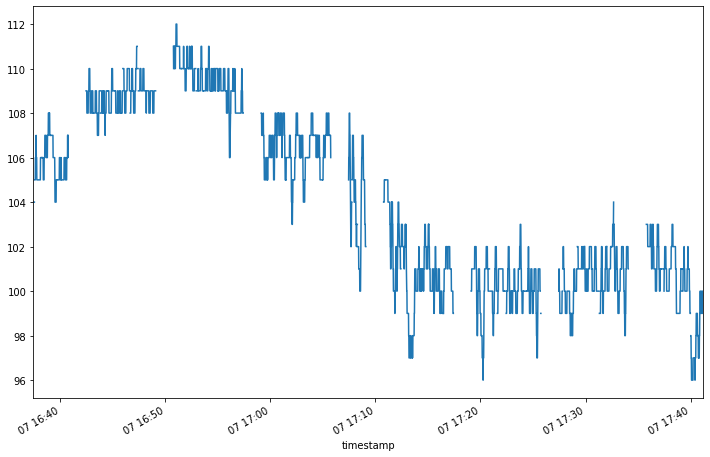

In [31]:
ct.time_series['hr_0002-4182'].plot(figsize=(12,8))

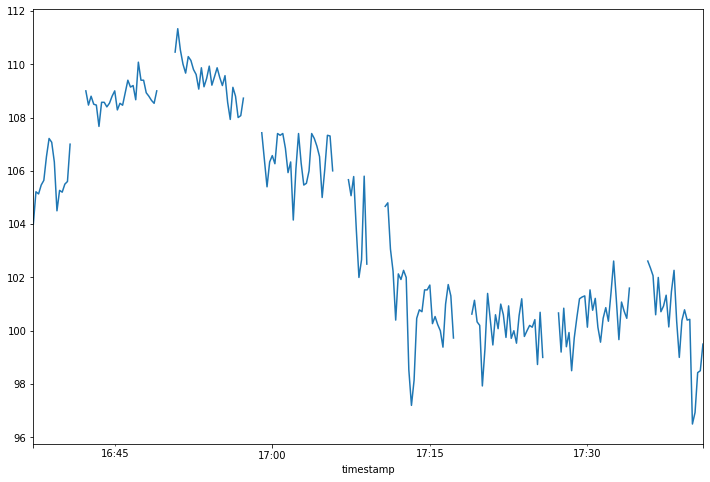

In [32]:
df_agg['hr_0002-4182'].resample(rule='15s').mean().plot.line(figsize=(12,8))